# Imports 

In [75]:
import pandas
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
import matplotlib.pyplot as plt
import random
from sklearn.metrics import mean_squared_error
import seaborn as sns

## Part A -- 

A. Build a baseline model (5 marks)

Use the Keras library to build a neural network with the following:

\- One hidden layer of 10 nodes, and a ReLU activation function

\- Use the adam optimizer and the mean squared error as the loss function.

    1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_split helper function from Scikit-learn.

    2. Train the model on the training data using 50 epochs.

    3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

    4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

    5. Report the mean and the standard deviation of the mean squared errors.


In [61]:
#Import Concrete data as a pandas dataframe
concrete_data = pandas.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')

In [85]:
def get_norm_of_dataframe(df):
    '''normalize a dataframe and return it'''
    return (df - df.mean())/df.std()


def get_mean_square_are_of_model(epochs):
    ##Get a random %30 of pandas dataframe with the sample method
    test_data = concrete_data.sample(int(len(concrete_data)*.3))


    ##Train data is just concrete data not found in test_data
    train_data = concrete_data[~concrete_data.index.isin(test_data.index)]

    ##Slice the dataframe so the input is everything except strength column
    x_test = test_data[[c for c in test_data.columns if c !='Strength']]
    x_train = train_data[[c for c in train_data.columns if c !='Strength']]

    ##The output data will be the strength data
    y_test = test_data['Strength']
    y_train = train_data['Strength']
    
    ##Normalize dataset
    x_test_norm, x_train_norm = get_norm_of_dataframe(x_test), get_norm_of_dataframe(x_train)
    
    # create model
    model = Sequential()

    n_cols = len(x_train.columns)
    ###Add hidden with extrapolated input from n_cols
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))

    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    
    #plot model
    plot_model(model,show_layer_names=False,show_shapes=True)
    
    '''
    Fit the model on the training data
    
    While the assignment says use validation on an evaluation step, you can also just do it in place. It helps in plotting
    '''
    history = model.fit(x_train_norm, y_train, validation_data=(x_test_norm,y_test),epochs=epochs,batch_size=10,verbose=0)
    
    
    '''
    As the assignment says, I will also use the predict function on the testing data to get predicted output
    from the other 30% data
    
    '''
    y_predicted = model.predict(x_test_norm)
    
    ##Now you can take the y_prediction and y_test and get their mean_square_error using the sklern function
    mse = mean_squared_error(y_test,y_predicted)

    #I want to return mse of the y_test - y_predicted as the assignment specifies.
    #I also want to return history so I can plot
    return history, mse

In [107]:
##Make a list to append all mean squared errors from the test datasets
all_errors = []

##Repeat 50 times
for repeats in range(50):
    #returns and history and mean square error
    h,mse = get_mean_square_are_of_model(50)
    ##append error
    all_errors.append(mse)

In [122]:
#convert errors to numpy array
errors = np.array(all_errors)

#Print it
print('Mean Error - {:.5}\nStandard Deviation of Error - {:.4}'.format(errors.mean(), errors.std()))

Mean Error - 132.12
Standard Deviation of Error - 12.49


In [123]:
all_errors = []
all_history_loss_test = []
all_history_loss_train = []
for i in range(50):
    h,mse = get_mean_square_are_of_model(50)
    all_errors.append(mse)
    all_history_loss_train.append(h.history['loss'])
    all_history_loss_test.append(h.history['val_loss'])


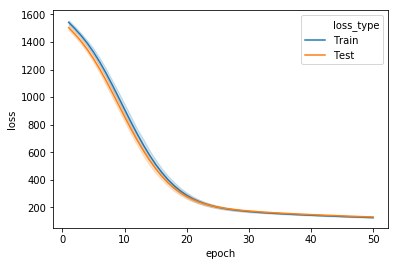

In [125]:
plotting_list = []
for i in range(len(all_history_loss_train)):
    for epoch in range(1,len(all_history_loss_train[i])+1):
        plotting_list.append(
            {
                'repeat':i+1,
                'epoch':epoch,
                'loss':all_history_loss_train[i][epoch-1],
                'loss_type':'Train'
                
            }
            
        )
    for epoch in range(1,len(all_history_loss_test[i])+1):
        plotting_list.append(
            {
                'repeat':i+1,
                'epoch':epoch,
                'loss':all_history_loss_test[i][epoch-1],
                'loss_type':'Test'
                
            }
            
        )
        
pd = pandas.DataFrame(plotting_list)
sns.lineplot(x='epoch',y='loss',data=pd,hue='loss_type')